In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from functions import perform_pipeline
from typing import List, Tuple

In [2]:
def load_image(image_path) -> np.ndarray:
    return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


def load_images_from_dir(dir_path: str) -> List[Tuple[str, np.ndarray]]:
    return [(filename, load_image(os.path.join(dir_path, filename)))
            for filename in os.listdir(dir_path)]

In [3]:
def plot_all_images(images):
    fig, axes = plt.subplots(3, 6, figsize=(20, 8))
    for i, (filename, image) in enumerate(images):
        row = i // 6
        col = i % 6
        axes[row, col].axis('off')
        axes[row, col].imshow(image, cmap='gray')
        axes[row, col].set_title(filename, fontsize=9)
    plt.tight_layout()
    plt.show()

In [4]:
NEW_DIM = 1008


def resize_all(images):
    for filename, image in images:
        # Resize the image
        resized_image = cv2.resize(image, (NEW_DIM, NEW_DIM))

        # Save the resized image (overwrite the original)
        cv2.imwrite(os.path.join(
            "resized", filename), resized_image)

In [5]:
def read_qr(image):
    assert image.shape == (1008, 1008), "Image must be 1008x1008 pixels"

    # split the image into 21 columns and 21 rows, each of 48x48 pixels
    rows = np.vsplit(image, 21)
    cells = np.array([np.hsplit(row, 21) for row in rows])

    new_image = np.zeros((21, 21), dtype=np.uint8)
    for i in range(cells.shape[0]):
        for j in range(cells.shape[1]):
            # make all the pixels in the cell either black or white
            _, cell = cv2.threshold(cells[i, j], 127, 255, cv2.THRESH_BINARY)

            # get first quartile of cell
            q1 = np.percentile(cell, 50)

            new_image[i, j] = q1

    return new_image

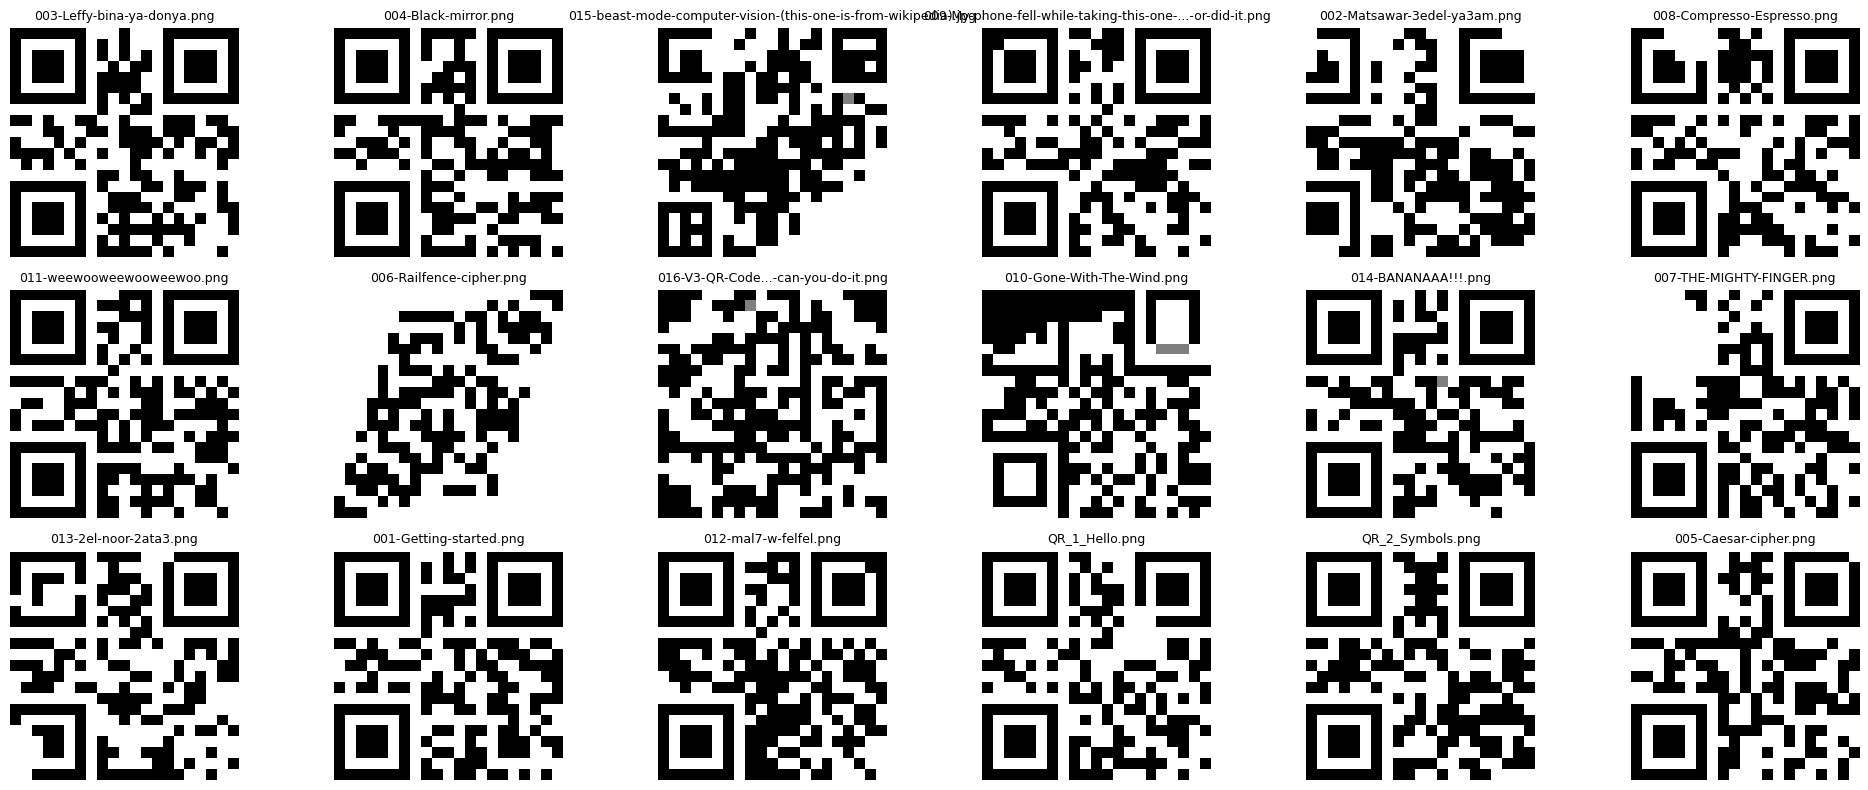

In [6]:
# orig_path = "test_cases"

# perform_pipeline(orig_path, log=False, plot=False)

out_imgs = load_images_from_dir("output_images")

resize_all(out_imgs)

resized_imgs = load_images_from_dir("resized")

read_images = [(filename, read_qr(image)) for filename, image in resized_imgs]

plot_all_images(read_images)

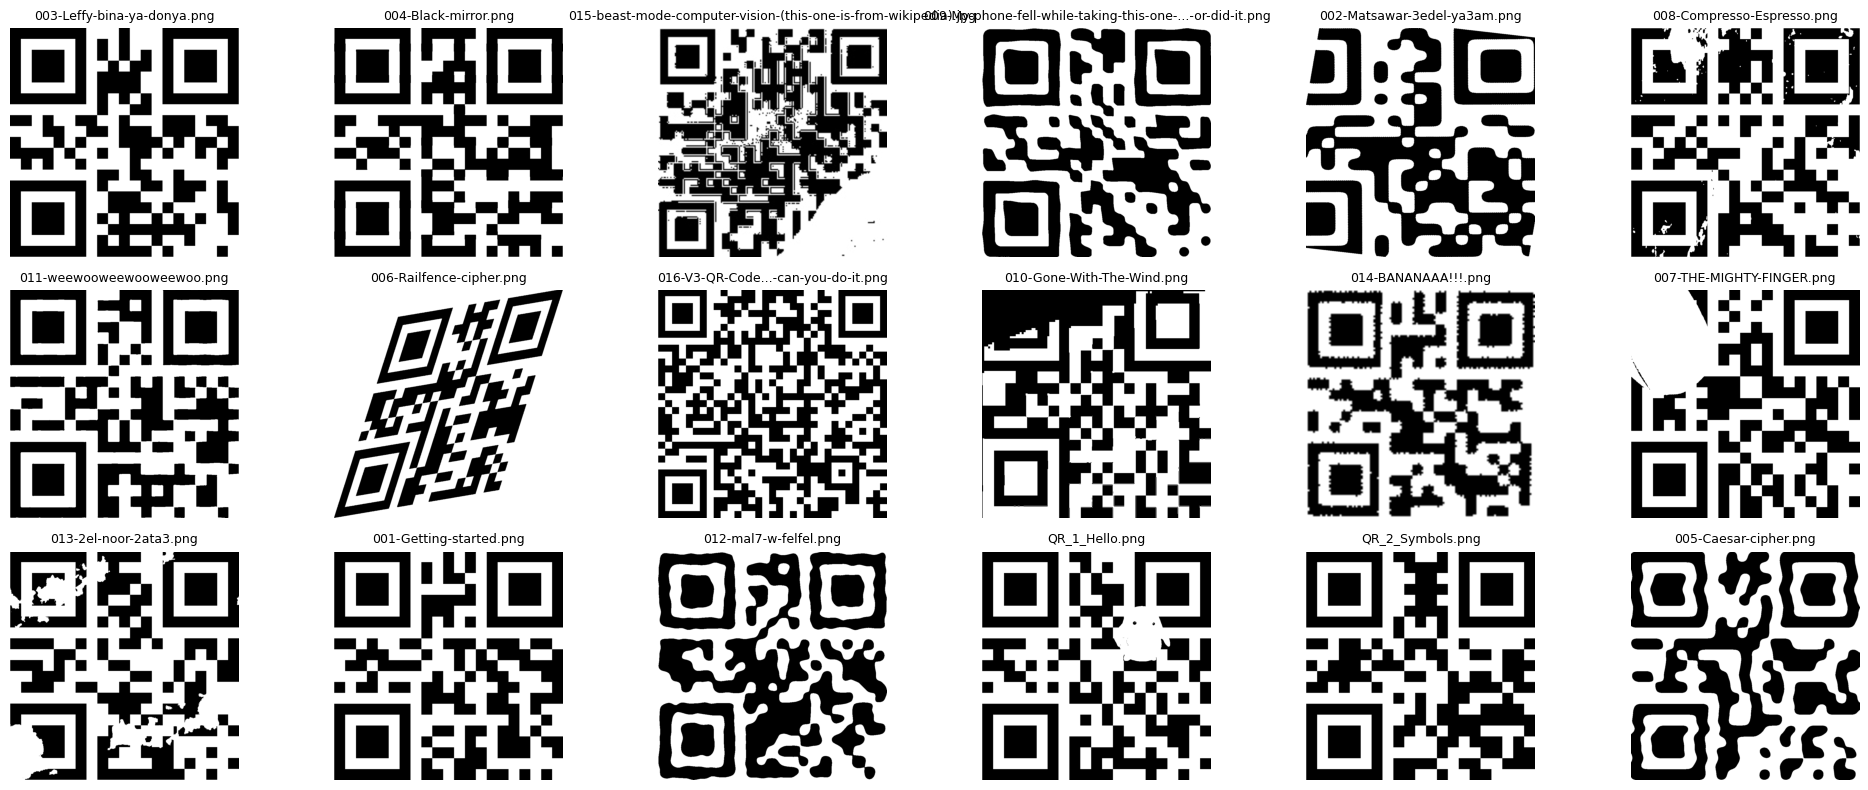

In [7]:
plot_all_images(resized_imgs)

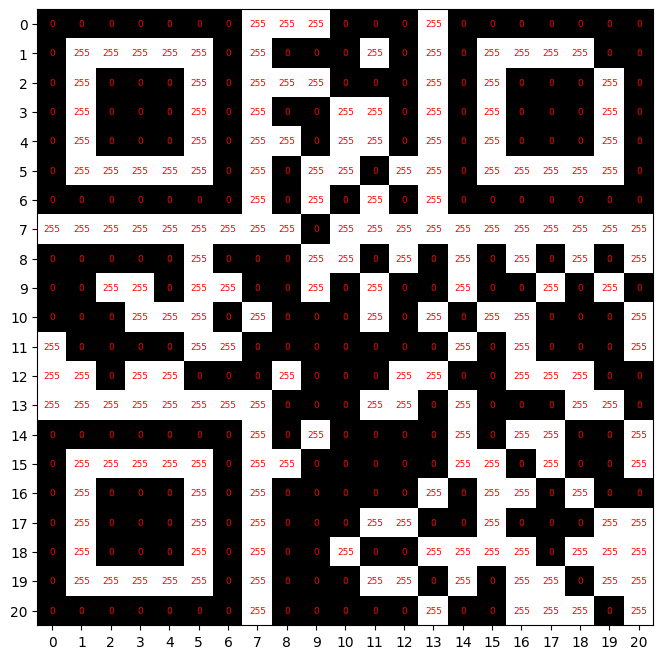

In [15]:
filepath = "resized_012-mal7-w-felfel.png"

img = cv2.imread(
    f"resized/{filepath}", cv2.IMREAD_GRAYSCALE)


# increase plot size
plt.figure(figsize=(8, 8))

plt.yticks(np.arange(0, 21, 1))
plt.xticks(np.arange(0, 21, 1))
# show values inside each cell
for i in range(21):
    for j in range(21):
        # decrease font size
        plt.text(j, i, new_image[i, j], ha='center',
                 va='center', color='red', fontsize=plt.rcParams['figure.figsize'][0])
    
plt.imshow(new_image, cmap='gray')

plt.show()

In [51]:
cell.shape

(48, 48)

In [52]:
new_image[1, 1]

255

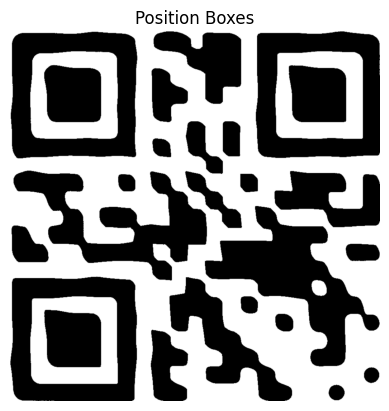

In [53]:
img = cv2.imread(
    "resized/resized_009-My-phone-fell-while-taking-this-one-...-or-did-it.png")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to obtain a binary image
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(
    thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on their area to identify the position boxes
position_boxes = []
for contour in contours:
    area = cv2.contourArea(contour)
    if 100 < area < 1000:  # Adjust the area threshold as needed
        position_boxes.append(contour)

canvas = img.copy()
cv2.drawContours(canvas, position_boxes, -1, (0, 255, 0), 2)
canvas_rgb = cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)

# Plot the image with contours using Matplotlib
plt.imshow(canvas_rgb)
plt.title('Position Boxes')
plt.axis('off')
plt.show()

In [20]:
def plot_all_images(images):
    fig, axes = plt.subplots(3, 6, figsize=(20, 8))
    for i, (filename, image) in enumerate(images):
        row = i // 6
        col = i % 6
        axes[row, col].axis('off')
        axes[row, col].imshow(image, cmap='gray')
        axes[row, col].set_title(filename, fontsize=9)
    plt.tight_layout()
    plt.show()

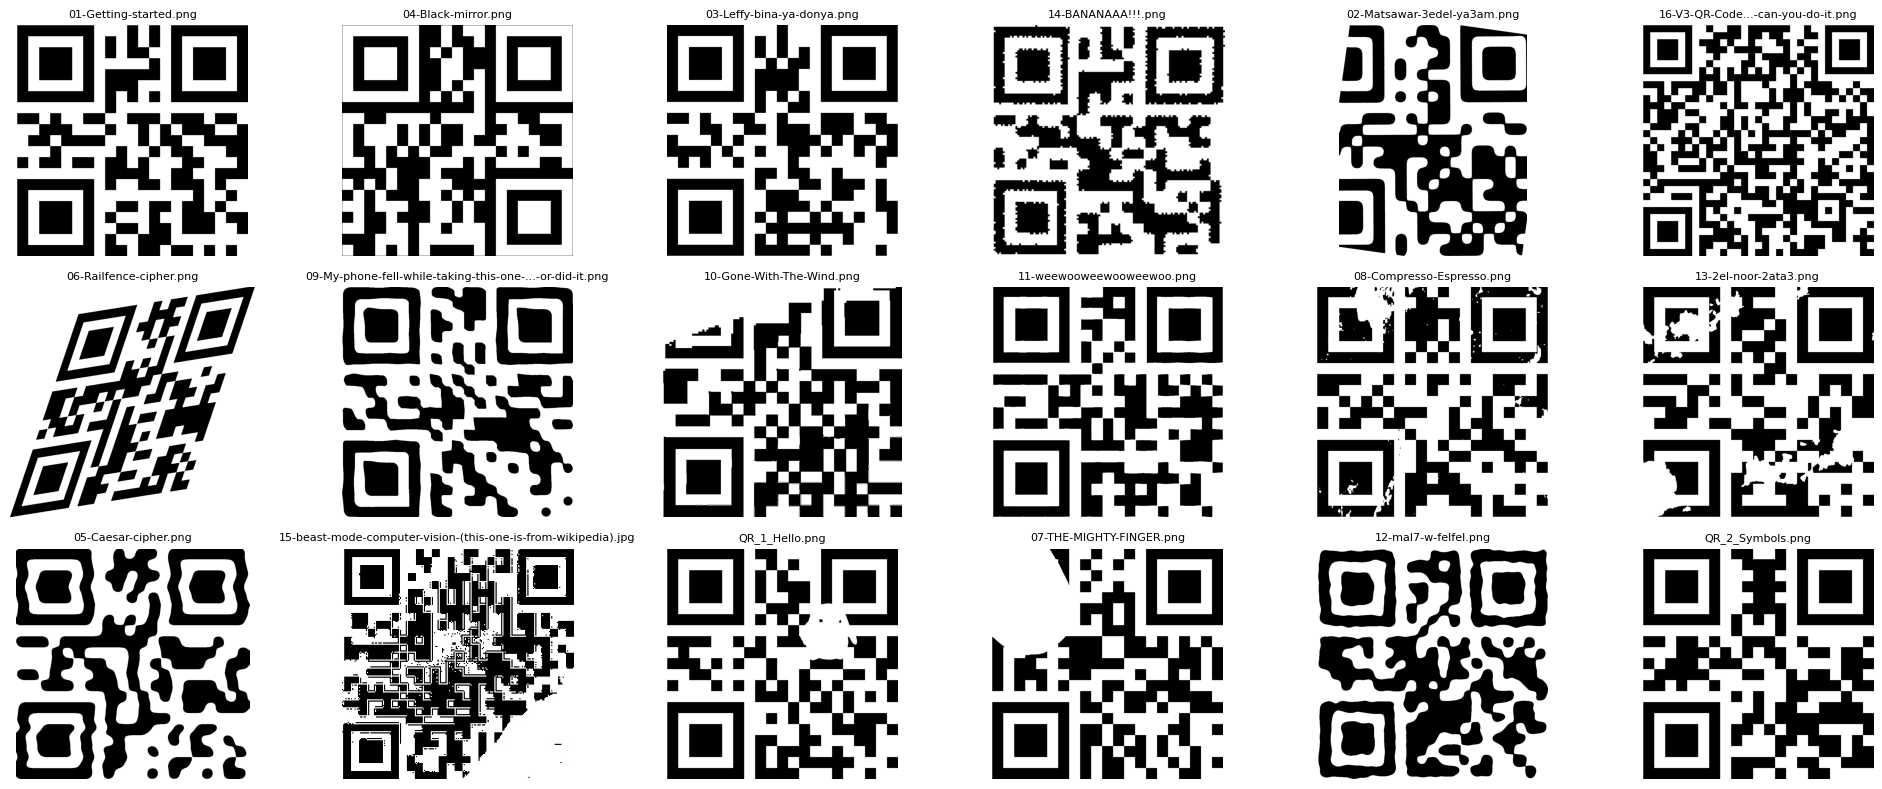

In [19]:
plot_all_images(images)